# Lesson 6 Assignment - Advertising Sales Regression

## Author - Natalie Moore



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [3]:
#creating function to perform linear regression on ad_data

def Ad_LinReg(x, y):
    # Model initialization
    regression_model = LinearRegression()
    # Fit the data(train the model)
    regression_model.fit(x, y)
    # Predict
    y_predicted = regression_model.predict(x)

    # model evaluation
    rmse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y, y_predicted)

    # printing values
    print('Slope:' ,regression_model.coef_)
    print('Intercept:', regression_model.intercept_)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

    # plotting values

    # data points
        
    plt.scatter(x, y, s=10)
    plt.xlabel(X[i])
    plt.ylabel('Sales')

    # predicted values
    plt.plot(x, y_predicted, color='r')
    plt.show()

Slope: [[0.04753664]]
Intercept: [7.03259355]
Root mean squared error:  10.512652915656757
R2 score:  0.611875050850071


C:\Users\natal\AnacondaNEW\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\natal\AnacondaNEW\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\natal\AnacondaNEW\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\natal\AnacondaNEW\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


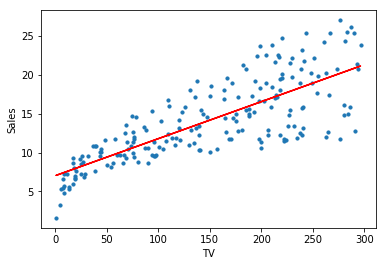

Slope: [[0.20249578]]
Intercept: [9.3116381]
Root mean squared error:  18.09239774512544
R2 score:  0.33203245544529525


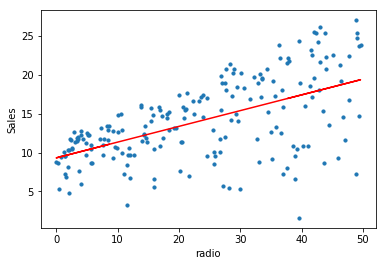

Slope: [[0.0546931]]
Intercept: [12.35140707]
Root mean squared error:  25.674022720559698
R2 score:  0.05212044544430516


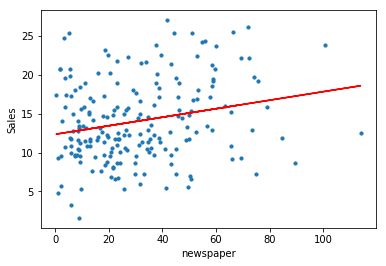

In [4]:
# Create numpy arrays for the x (independent) and y (dependent) variables
TV = ad_data.TV.as_matrix().reshape(-1,1)
Radio = ad_data.radio.as_matrix().reshape(-1,1)
Newspaper = ad_data.newspaper.as_matrix().reshape(-1,1)

X_reshaped = [TV, Radio, Newspaper]
X = [ad_data.TV.name, ad_data.radio.name, ad_data.newspaper.name]

Sales = ad_data.sales.as_matrix().reshape(-1,1)

#performing the 3 linear regressions on the TV, radio, and newspaper columns
for i in range(len(X)):  
    Ad_LinReg(X_reshaped[i], Sales)

### TV:
For the TV parameters/plot, the line of best fit is $$Sales = 0.04753664(TV) + 7.03259355$$


### Radio:
For the radio parameters/plot, the line of best fit is $$Sales = 0.20249578(radio) + 9.3116381$$


### Newspaper:
For the newspaper parameters/plot, the line of best fit is $$Sales = 0.0546931(newspaper) + 12.35140707$$

In [19]:
#creating variables
i = TV
j = Radio
k = Newspaper
X = ad_data[['TV','radio','newspaper']].values
y = ad_data['sales'].values

#creating my training and testing models: testing are 20%, training are 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

X_columns = ['TV','radio','newspaper']
coeff_df = pd.DataFrame(regressor.coef_, X_columns, columns=['Coefficient'])  

y_pred = regressor.predict(X_test)

RootMeanSquaredError = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [17]:
coeff_df

,Coefficient
TV,0.044584
radio,0.196497
newspaper,-0.002781


The coefficients above show the weight (i.e. slope) each parameter has on overall sales. It looks like radio has the most impact, increasing sales by about .2 units for each unit in the radio array. Newspaper ads have the least impact, actually decreasing sales by about .003 units for each unit in the newspaper array.

In [18]:
RootMeanSquaredError

2.098122563495679

Above is the RMSE of the multiple linear regression of ad_data with sales as dependent. 